In [1]:
from utils import *
from fluxtower_parse import *
import numpy as np       
import datetime as dt  
import matplotlib.pyplot as plt

In [2]:
# Use this to extract, process and save data. 
# Data location:
dpath= '/Volumes/Data/ICECAPSarchive/fluxtower/raw_extracted/KT/'
# Log data parsing issues here: 
logf = '/Users/heather/ICECAPS-ACE/log.txt'
# Save data location:
out_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/KT/'

# Start and stop date:
all_start = dt.datetime(2019,5,30,0,0)
all_stop = dt.datetime(2019,9,1,0,0)

all_days = pd.date_range(all_start,all_stop,freq='1D')

# Loop through and split into daily files
for i in range(0,len(all_days)-1):
    start = all_days[i]
    stop = all_days[i+1]
    day_str = str(start.date()) 
    print(str(start) + ' to ' + str(stop))

    # Get KT
    KT = extract_KT_data(start,stop,dpath,logf,save=out_loc)


2019-05-28 00:00:00 to 2019-05-29 00:00:00
2019-05-29 00:00:00 to 2019-05-30 00:00:00
2019-05-30 00:00:00 to 2019-05-31 00:00:00
2019-05-31 00:00:00 to 2019-06-01 00:00:00
2019-06-01 00:00:00 to 2019-06-02 00:00:00
2019-06-02 00:00:00 to 2019-06-03 00:00:00
2019-06-03 00:00:00 to 2019-06-04 00:00:00
2019-06-04 00:00:00 to 2019-06-05 00:00:00
2019-06-05 00:00:00 to 2019-06-06 00:00:00
2019-06-06 00:00:00 to 2019-06-07 00:00:00
2019-06-07 00:00:00 to 2019-06-08 00:00:00
2019-06-08 00:00:00 to 2019-06-09 00:00:00
2019-06-09 00:00:00 to 2019-06-10 00:00:00
2019-06-10 00:00:00 to 2019-06-11 00:00:00
2019-06-11 00:00:00 to 2019-06-12 00:00:00
2019-06-12 00:00:00 to 2019-06-13 00:00:00
2019-06-13 00:00:00 to 2019-06-14 00:00:00
2019-06-14 00:00:00 to 2019-06-15 00:00:00
2019-06-15 00:00:00 to 2019-06-16 00:00:00
2019-06-16 00:00:00 to 2019-06-17 00:00:00
2019-06-17 00:00:00 to 2019-06-18 00:00:00
2019-06-18 00:00:00 to 2019-06-19 00:00:00
2019-06-19 00:00:00 to 2019-06-20 00:00:00
2019-06-20 

In [5]:
# Data location:
dpath= '/Volumes/Data/ICECAPSarchive/fluxtower/raw_extracted/KT/'
# Log data parsing issues here: 
logf = '/Users/heather/ICECAPS-ACE/log.txt'
# Save data location:
out_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/KT/Other/'

# Start and stop date:
all_start = dt.datetime(2019,6,12,0,0)
all_stop = dt.datetime(2019,6,13,0,0)

all_days = pd.date_range(all_start,all_stop,freq='1D')

# Get KT
KT = extract_KT_data(all_start,all_stop,dpath,logf,save=out_loc)

In [3]:
# Input processed data location
d_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/KT/'

# Start and stop date:
start = dt.datetime(2019,6,12,0,0)
stop = dt.datetime(2019,8,1,0,0)

# Days to loop through
days = pd.date_range(start,stop,freq='1D')

KT = pd.DataFrame(columns=['T','Units'])

## Start loop ##
for day in days:
    day_str = str(day.date()) 
    #print(day_str)
    if os.path.isfile(d_loc+'KT_%s'%day_str):
        KT = KT.append(pd.read_csv(d_loc+'KT_%s'%day_str, index_col=0, parse_dates=[0]))

KT = KT[~KT.index.duplicated()]

(737291.0, 737304.0)

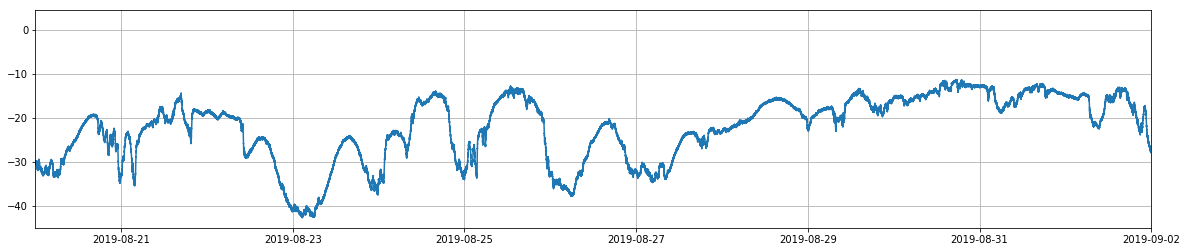

In [19]:

fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.plot(KT['T'])
ax1.set_xlim(dt.datetime(2019,8,20,0,0),dt.datetime(2019,9,2,0,0))
#ax1.plot(all_snd.index,all_snd['depth'])
#ax1.set_ylabel('Distance to snow surface (m)')

In [10]:
max(KT['T'])

2.19

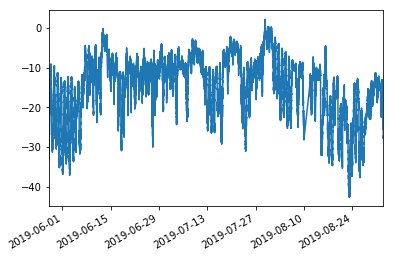

In [15]:
KT['T'].plot()